In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [3]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [4]:
encoder = keras.Sequential([keras.layers.Dense(2)])
decoder = keras.Sequential([keras.layers.Dense(3)])
autoencoder = keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

n_points = 100
dataset = (np.random.rand(n_points, 3)) **2
history = autoencoder.fit(dataset, dataset, epochs=10)
codings = encoder.predict(dataset)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5525  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.1866
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.0760
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.0591
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.0590
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 0.0523
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.0505
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.0473
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0469
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0473
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


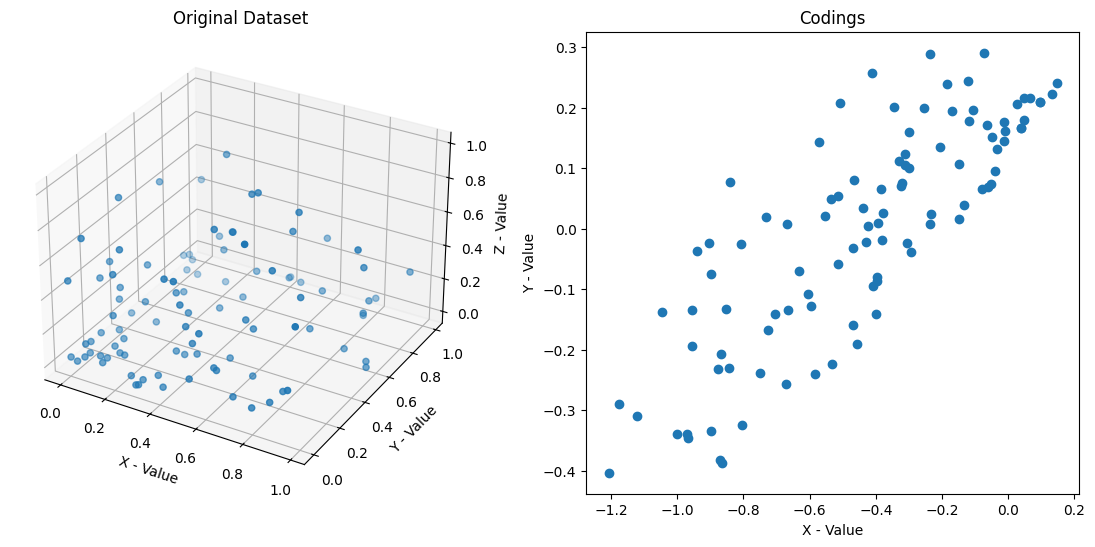

In [5]:
from matplotlib import pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(14,6))

# Add a 3D subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
# Scatter plot of the points
p = ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2])

# Set labels
ax.set_title('Original Dataset')
ax.set_xlabel('X - Value')
ax.set_ylabel('Y - Value')
ax.set_zlabel('Z - Value')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(codings[:, 0], codings[:, 1])
ax.set_title('Codings')
ax.set_xlabel('X - Value')
ax.set_ylabel('Y - Value')

# Show the plot
plt.show()

In [6]:
dataset.min(axis=0), dataset.max(axis=0)

(array([4.19523616e-07, 4.91222409e-04, 1.74701369e-05]),
 array([0.98565483, 0.98609654, 0.98963377]))

In [7]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
])

/Users/jonas/PycharmProjects/DLML_Shakespear/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[10]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape((28,28))
])

/Users/jonas/PycharmProjects/DLML_Shakespear/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [10]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

In [11]:
history = stacked_autoencoder.fit(x_train, x_train, epochs = 10, validation_data=[x_test, x_test])
print("")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2170 - val_loss: 0.1358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1354 - val_loss: 0.1280
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1285 - val_loss: 0.1239
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1247 - val_loss: 0.1216
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1223 - val_loss: 0.1198
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1206 - val_loss: 0.1189
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1194 - val_loss: 0.1180
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1184 - val_loss: 0.1170
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1175 - val_loss: 0.1165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1170 - val_loss: 0.1160



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


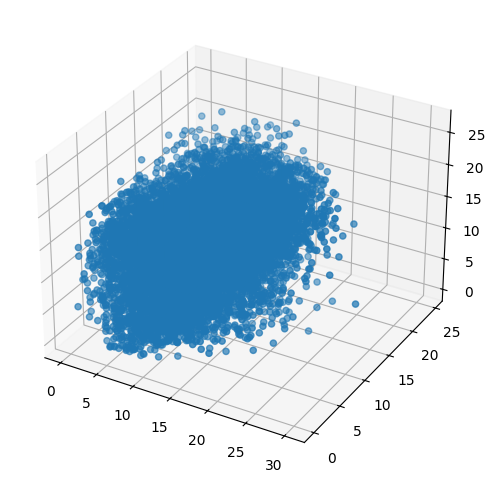

In [12]:
codings = encoder.predict(x_test)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(codings[:, 0], codings[:, 1], codings[:, 2])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


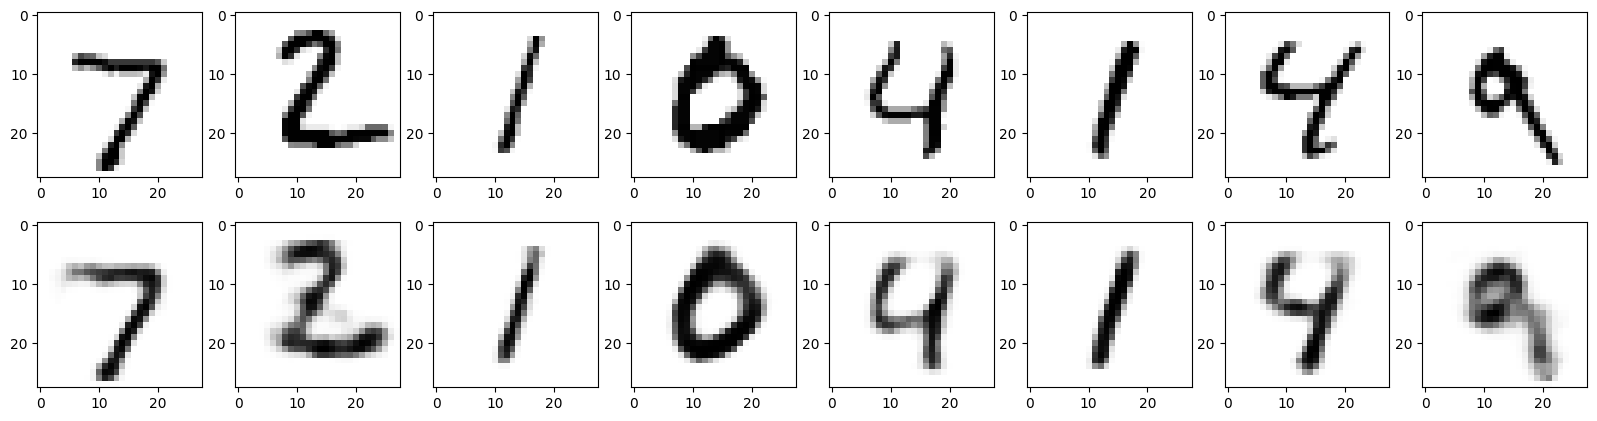

In [13]:
from matplotlib.pyplot import subplot, imshow
from IPython.core.pylabtools import figsize

figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")